LOAD THE DATA

In [2]:
#import pandas library
import pandas as pd

# Load the Excel file
Instagram = pd.read_excel("instagram_data.xlsx")

# Display the first few rows of the dataset
Instagram.head()

,USERNAME,FOLLOWERS,FOLLOWING,LIKES,COMMENTS,TEXT,DATE,"TYPE(1 PHOTO,2 VIDEO)",USERS IN PHOTO,LINK,list_of_tags,number_of_tags,list_of_mentions,number_of_mentions
0,georgiou82,1134619,915,18560,95,Every day is a #newday and every experience is...,2017-02-11 11:05:10,1,1,https://www.instagram.com/p/BQXZpSQjiPj,#newday #newera,2,NaN,0
1,georgiou82,1134619,915,17710,86,#goodnight !!! The #weekend is ahead!!! Have a...,2017-02-11 00:33:10,1,1,https://www.instagram.com/p/BQWRUV6j8b-,#goodnight #weekend #goodone,3,NaN,0
2,georgiou82,1134619,915,11959,79,#tb #2007 #stous31dromous #megatv #greece #new...,2017-02-09 15:51:47,1,3,https://www.instagram.com/p/BQSw2wMj0Bw,#tb #2007 #stous31dromous #megatv #greece #new...,7,NaN,0
3,georgiou82,1134619,915,13608,37,Cold weather brings people together.... #filmi...,2017-02-08 18:21:57,1,3,https://www.instagram.com/p/BQQdPrLDeRz,#filming #mprousko4,2,@stamosts @kinolis2,2
4,georgiou82,1134619,915,15842,62,The youngest hearts might be the oldest souls....,2017-02-08 13:03:14,1,0,https://www.instagram.com/p/BQP4xY7jAXb,#lifelessons #andreasgeorgiou #tb #peru,4,NaN,0


In [3]:
## Printing the shape of the data
Instagram.shape

(19681, 14)

In [4]:
#checking the datatypes
Instagram.dtypes

USERNAME                         object
FOLLOWERS                         int64
FOLLOWING                         int64
LIKES                             int64
COMMENTS                          int64
TEXT                             object
DATE                     datetime64[ns]
TYPE(1 PHOTO,2 VIDEO)             int64
USERS IN PHOTO                   object
LINK                             object
list_of_tags                     object
number_of_tags                    int64
list_of_mentions                 object
number_of_mentions                int64
dtype: object

In [5]:
#Checking the summary statistics
Instagram.describe()

,FOLLOWERS,FOLLOWING,LIKES,COMMENTS,DATE,"TYPE(1 PHOTO,2 VIDEO)",number_of_tags,number_of_mentions
count,1.968100e+04,19681.000000,19681.000000,19681.000000,19681,19681.000000,19681.000000,19681.000000
mean,6.256413e+04,1489.766831,2497.766983,39.825111,2017-04-21 05:07:52.777196288,1.095981,6.737005,0.723591
min,1.799300e+04,0.000000,0.000000,0.000000,2016-03-27 08:21:35,1.000000,0.000000,0.000000
25%,2.329900e+04,174.000000,420.000000,1.000000,2017-04-17 21:08:39,1.000000,0.000000,0.000000
50%,3.669900e+04,506.000000,1073.000000,5.000000,2017-04-22 15:32:28,1.000000,3.000000,0.000000
75%,6.279100e+04,1367.000000,2683.000000,17.000000,2017-04-27 13:03:24,1.000000,10.000000,1.000000
max,1.134619e+06,7586.000000,158338.000000,26011.000000,2017-05-02 17:07:30,2.000000,41.000000,34.000000
std,1.042349e+05,2252.675356,5574.988136,447.972795,NaN,0.294573,8.782144,1.704316


EXTRACT THE VARIABLES FROM THE DATE COLUMN

In [7]:

# Ensure the 'DATE' column is in datetime format
Instagram['DATE'] = pd.to_datetime(Instagram['DATE'])

# Extract month, day, and day of the week
Instagram['Month'] = Instagram['DATE'].dt.month
Instagram['Day'] = Instagram['DATE'].dt.day
Instagram['Day_of_week'] = Instagram['DATE'].dt.day_name()

# Function to categorize the timing of the post
def categorize_timing(hour):
    if 8 <= hour < 12:
        return 'Morning'
    elif 12 <= hour < 16:
        return 'Afternoon'
    elif 16 <= hour < 20:
        return 'Evening'
    else:
        return 'Night'

# Extract the hour from the 'DATE' column and apply the categorization function
Instagram['Timing_of_post'] = Instagram['DATE'].dt.hour.apply(categorize_timing)

# Display the modified DataFrame
print(Instagram[['DATE', 'Month', 'Day', 'Day_of_week', 'Timing_of_post']].head())

                 DATE  Month  Day Day_of_week Timing_of_post
0 2017-02-11 11:05:10      2   11    Saturday        Morning
1 2017-02-11 00:33:10      2   11    Saturday          Night
2 2017-02-09 15:51:47      2    9    Thursday      Afternoon
3 2017-02-08 18:21:57      2    8   Wednesday        Evening
4 2017-02-08 13:03:14      2    8   Wednesday      Afternoon


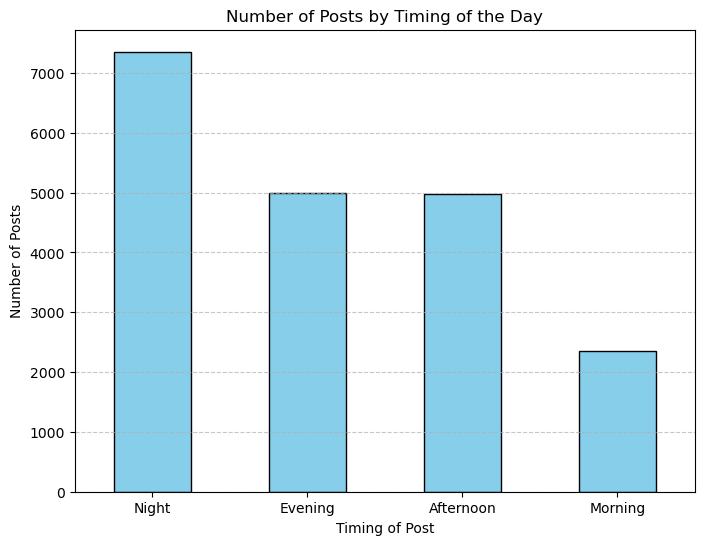

In [8]:
#Bar chart for posts timing of the day
import matplotlib.pyplot as plt
# Count the number of posts in each timing category
timing_counts = Instagram['Timing_of_post'].value_counts()

# Bar chart
plt.figure(figsize=(8, 6))
timing_counts.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Number of Posts by Timing of the Day')
plt.xlabel('Timing of Post')
plt.ylabel('Number of Posts')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


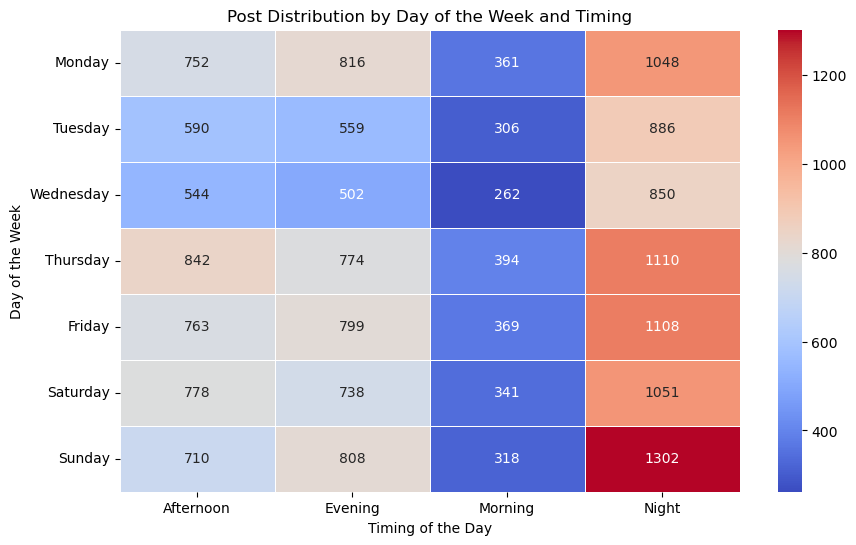

In [9]:
#Heatmap of Posts by Day of the Week and Timing
import seaborn as sns
import pandas as pd

# Create a pivot table for the heatmap
heatmap_data = Instagram.pivot_table(index='Day_of_week', 
                                     columns='Timing_of_post', 
                                     values='DATE', 
                                     aggfunc='count')

# Ensure correct day order
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
heatmap_data = heatmap_data.reindex(day_order)

# Heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(heatmap_data, annot=True, cmap='coolwarm', fmt='.0f', linewidths=0.5)
plt.title('Post Distribution by Day of the Week and Timing')
plt.xlabel('Timing of the Day')
plt.ylabel('Day of the Week')
plt.show()


CLEAN THE DATA

In [11]:
#Converting the datatype for USERS IN PHOTO  to integer
Instagram['USERS IN PHOTO'] = pd.to_numeric(Instagram['USERS IN PHOTO'], errors='coerce')

#checking if the data type has changed
Instagram.dtypes

USERNAME                         object
FOLLOWERS                         int64
FOLLOWING                         int64
LIKES                             int64
COMMENTS                          int64
TEXT                             object
DATE                     datetime64[ns]
TYPE(1 PHOTO,2 VIDEO)             int64
USERS IN PHOTO                  float64
LINK                             object
list_of_tags                     object
number_of_tags                    int64
list_of_mentions                 object
number_of_mentions                int64
Month                             int32
Day                               int32
Day_of_week                      object
Timing_of_post                   object
dtype: object

In [12]:
#Veryfing the number of null values
Instagram.isnull().sum()

USERNAME                     0
FOLLOWERS                    0
FOLLOWING                    0
LIKES                        0
COMMENTS                     0
TEXT                         6
DATE                         0
TYPE(1 PHOTO,2 VIDEO)        0
USERS IN PHOTO            8527
LINK                         0
list_of_tags              5819
number_of_tags               0
list_of_mentions         12935
number_of_mentions           0
Month                        0
Day                          0
Day_of_week                  0
Timing_of_post               0
dtype: int64

In [13]:
##As the data in the following columns is NAN values we are substituting them with a 0
columns_to_fill = ['list_of_tags', 'list_of_mentions', 'USERS IN PHOTO']
Instagram[columns_to_fill] = Instagram[columns_to_fill].fillna(0)
Instagram.isnull().sum()

USERNAME                 0
FOLLOWERS                0
FOLLOWING                0
LIKES                    0
COMMENTS                 0
TEXT                     6
DATE                     0
TYPE(1 PHOTO,2 VIDEO)    0
USERS IN PHOTO           0
LINK                     0
list_of_tags             0
number_of_tags           0
list_of_mentions         0
number_of_mentions       0
Month                    0
Day                      0
Day_of_week              0
Timing_of_post           0
dtype: int64

In [14]:
# Handle missing values in the TEXT column
Instagram['TEXT'] = Instagram['TEXT'].fillna("")  # Replace NaN with an empty string

# Add a new column with the length of each post
Instagram['Length_of_Post'] = Instagram['TEXT'].apply(len)

# Display the updated DataFrame with the new column
print(Instagram[['TEXT', 'Length_of_Post']].head())

                                                TEXT  Length_of_Post
0  Every day is a #newday and every experience is...              56
1  #goodnight !!! The #weekend is ahead!!! Have a...              64
2  #tb #2007 #stous31dromous #megatv #greece #new...              60
3  Cold weather brings people together.... #filmi...             103
4  The youngest hearts might be the oldest souls....              91


In [15]:
# Replace the values 1 and 2 with 'Photo' and 'Video' respectively
Instagram['TYPE(1 PHOTO,2 VIDEO)'] = Instagram['TYPE(1 PHOTO,2 VIDEO)'].replace({1: 'Photo', 2: 'Video'})

# Display the updated DataFrame
print(Instagram.head())


     USERNAME  FOLLOWERS  FOLLOWING  LIKES  COMMENTS  \
0  georgiou82    1134619        915  18560        95   
1  georgiou82    1134619        915  17710        86   
2  georgiou82    1134619        915  11959        79   
3  georgiou82    1134619        915  13608        37   
4  georgiou82    1134619        915  15842        62   

                                                TEXT                DATE  \
0  Every day is a #newday and every experience is... 2017-02-11 11:05:10   
1  #goodnight !!! The #weekend is ahead!!! Have a... 2017-02-11 00:33:10   
2  #tb #2007 #stous31dromous #megatv #greece #new... 2017-02-09 15:51:47   
3  Cold weather brings people together.... #filmi... 2017-02-08 18:21:57   
4  The youngest hearts might be the oldest souls.... 2017-02-08 13:03:14   

  TYPE(1 PHOTO,2 VIDEO)  USERS IN PHOTO  \
0                 Photo             1.0   
1                 Photo             1.0   
2                 Photo             3.0   
3                 Photo           

In [16]:
# Rename the specified columns in the Instagram DataFrame
Instagram = Instagram.rename(columns={
    'FOLLOWERS': 'Number_of_followers',
    'FOLLOWING': 'Number_of_following',
    'MONTH': 'Month_of_posting',
    'DAY_OF_WEEK': 'Day_of_posting',
    'TIME_OF_DAY': 'Timing_of_the_post',
    'number_of_mentions': 'Number_of_people_tagged',
    'TYPE(1 PHOTO,2 VIDEO)': 'Type_of_post',
    'USERS IN PHOTO': 'Number_of_users_post',
    'number_of_tags': 'Number_of_Hashtags'
})

# Display the updated DataFrame with renamed columns
print(Instagram.columns)


Index(['USERNAME', 'Number_of_followers', 'Number_of_following', 'LIKES',
       'COMMENTS', 'TEXT', 'DATE', 'Type_of_post', 'Number_of_users_post',
       'LINK', 'list_of_tags', 'Number_of_Hashtags', 'list_of_mentions',
       'Number_of_people_tagged', 'Month', 'Day', 'Day_of_week',
       'Timing_of_post', 'Length_of_Post'],
      dtype='object')


DUMMY CODING THE VARIABLES

In [18]:
# Generate dummy variables for 'Month', 'Timing_of_post', 'Day_of_week', and 'Type_of_post'
month_dummies = pd.get_dummies(Instagram['Month'], prefix='Month', dtype=int, drop_first=True)
timing_of_post_dummies = pd.get_dummies(Instagram['Timing_of_post'], prefix='Timing_of_post', dtype=int, drop_first=True)
day_of_week_dummies = pd.get_dummies(Instagram['Day_of_week'], prefix='Day_of_week', dtype=int, drop_first=True)
type_of_post_dummies = pd.get_dummies(Instagram['Type_of_post'], prefix='Type_of_post', dtype=int, drop_first=True)

# Concatenate the dummy variables back to the original DataFrame
Instagram = pd.concat([Instagram, month_dummies, timing_of_post_dummies, day_of_week_dummies, type_of_post_dummies], axis=1)

# Drop the original 'Month', 'Timing_of_post', 'Day_of_week', and 'TYPE(1 PHOTO,2 VIDEO)' columns if you no longer need them
Instagram.drop(columns=['Month', 'Timing_of_post', 'Day_of_week', 'Type_of_post'], inplace=True)

# Display the updated DataFrame with dummy variables
print(Instagram.head())


     USERNAME  Number_of_followers  Number_of_following  LIKES  COMMENTS  \
0  georgiou82              1134619                  915  18560        95   
1  georgiou82              1134619                  915  17710        86   
2  georgiou82              1134619                  915  11959        79   
3  georgiou82              1134619                  915  13608        37   
4  georgiou82              1134619                  915  15842        62   

                                                TEXT                DATE  \
0  Every day is a #newday and every experience is... 2017-02-11 11:05:10   
1  #goodnight !!! The #weekend is ahead!!! Have a... 2017-02-11 00:33:10   
2  #tb #2007 #stous31dromous #megatv #greece #new... 2017-02-09 15:51:47   
3  Cold weather brings people together.... #filmi... 2017-02-08 18:21:57   
4  The youngest hearts might be the oldest souls.... 2017-02-08 13:03:14   

   Number_of_users_post                                     LINK  \
0                 

In [19]:
#Shape of the newly extracted variables
print(Instagram.shape)
print(month_dummies.shape)
print(day_of_week_dummies.shape)
print(timing_of_post_dummies.shape)
print(type_of_post_dummies.shape)

(19681, 35)
(19681, 10)
(19681, 6)
(19681, 3)
(19681, 1)


Checking the duplicate values

In [21]:
duplicates = Instagram[Instagram.duplicated(keep=False)]
duplicates

,USERNAME,Number_of_followers,Number_of_following,LIKES,COMMENTS,TEXT,DATE,Number_of_users_post,LINK,list_of_tags,...,Timing_of_post_Evening,Timing_of_post_Morning,Timing_of_post_Night,Day_of_week_Monday,Day_of_week_Saturday,Day_of_week_Sunday,Day_of_week_Thursday,Day_of_week_Tuesday,Day_of_week_Wednesday,Type_of_post_Video


CALCULATIONG ZSCORE

In [23]:
import pandas as pd
import numpy as np
from scipy import stats

# List of the relevant numerical columns based on variable names
numerical_columns = [
    'Number_of_followers', 'Number_of_following', 'LIKES', 'COMMENTS',
    'Number_of_users_post', 'Number_of_Hashtags', 
    'Number_of_people_tagged', 'Length_of_Post', 'Month_2', 'Month_3',
    'Month_4', 'Month_5', 'Month_7', 'Month_8', 'Month_9', 'Month_10', 
    'Month_11', 'Month_12', 'Timing_of_post_Evening', 'Timing_of_post_Morning', 
    'Timing_of_post_Night', 'Day_of_week_Monday', 'Day_of_week_Saturday', 
    'Day_of_week_Sunday', 'Day_of_week_Thursday', 'Day_of_week_Tuesday', 
    'Day_of_week_Wednesday', 'Type_of_post_Video'
]

# Convert columns to numeric, forcing errors to NaN (non-numeric values will become NaN)
Instagram[numerical_columns] = Instagram[numerical_columns].apply(pd.to_numeric, errors='coerce')

# Handle missing values by dropping rows with NaN values in the numerical columns
Instagram_clean = Instagram.dropna(subset=numerical_columns)

# Calculate Z-scores for these columns
z_scores = stats.zscore(Instagram_clean[numerical_columns])

# Define a threshold for Z-scores to identify outliers (common threshold: 3 or -3)
threshold = 3

# Create a boolean mask where Z-score exceeds the threshold (outliers)
outliers = (abs(z_scores) > threshold)

# Create a DataFrame showing which rows are outliers
outliers_df = pd.DataFrame(outliers, columns=numerical_columns)

# Print the number of outliers detected in each column
outliers_count = outliers_df.sum(axis=0)
print("Number of outliers detected in each column:")
print(outliers_count)

# Filter out the rows that have outliers
#Instagram_no_outliers = Instagram_clean[~outliers.any(axis=1)]


# Save the outlier-free data in the Instagram DataFrame
#Instagram = Instagram_no_outliers

# Optionally, print the first few rows of the cleaned data to verify
#print("\nOutlier-free data:")
#print(Instagram.head())

#print(Instagram.columns)


Number of outliers detected in each column:
Number_of_followers         337
Number_of_following           0
LIKES                       239
COMMENTS                     70
Number_of_users_post        356
Number_of_Hashtags           15
Number_of_people_tagged     382
Length_of_Post              259
Month_2                      22
Month_3                       5
Month_4                    1437
Month_5                    1311
Month_7                       9
Month_8                      21
Month_9                      27
Month_10                     15
Month_11                      9
Month_12                      3
Timing_of_post_Evening        0
Timing_of_post_Morning        0
Timing_of_post_Night          0
Day_of_week_Monday            0
Day_of_week_Saturday          0
Day_of_week_Sunday            0
Day_of_week_Thursday          0
Day_of_week_Tuesday           0
Day_of_week_Wednesday         0
Type_of_post_Video         1889
dtype: int64


In [24]:
# Replace NaN values with 0
Instagram['Number_of_users_post'] = Instagram['Number_of_users_post'].fillna(0)

# Convert the column to integer type
Instagram['Number_of_users_post'] = Instagram['Number_of_users_post'].astype(int)

# Check the result
print(Instagram['Number_of_users_post'].head())


0    1
1    1
2    3
3    3
4    0
Name: Number_of_users_post, dtype: int32


In [25]:
#CALCULATING THE CORRELATION

# Convert the column names to strings 
Instagram.columns = Instagram.columns.astype(str)

# Select the relevant columns for the correlation matrix based on the variable names you provided
columns_for_correlation_matrix = Instagram[['Number_of_followers', 'Number_of_following', 'Number_of_people_tagged', 
                                             'Number_of_users_post', 'Length_of_Post', 'LIKES', 'COMMENTS', 
                                             'Day_of_week_Monday', 'Day_of_week_Saturday', 'Day_of_week_Sunday', 
                                             'Day_of_week_Thursday', 'Day_of_week_Tuesday', 'Day_of_week_Wednesday', 
                                             'Number_of_Hashtags', 'Length_of_Post', 
                                             'Timing_of_post_Evening', 'Timing_of_post_Morning', 'Timing_of_post_Night', 
                                             'Month_2', 'Month_3', 'Month_4', 'Month_5', 'Month_7', 'Month_8', 
                                             'Month_9', 'Month_10', 'Month_11', 'Month_12', 'Type_of_post_Video']]

columns_for_correlation_matrix = Instagram.select_dtypes(include=['int32', 'float64'])

# Calculate the correlation matrix
correlation_matrix = columns_for_correlation_matrix.corr()

# Print the correlation matrix
correlation_matrix


,Number_of_users_post,Day,Month_2,Month_3,Month_4,Month_5,Month_7,Month_8,Month_9,Month_10,...,Timing_of_post_Evening,Timing_of_post_Morning,Timing_of_post_Night,Day_of_week_Monday,Day_of_week_Saturday,Day_of_week_Sunday,Day_of_week_Thursday,Day_of_week_Tuesday,Day_of_week_Wednesday,Type_of_post_Video
Number_of_users_post,1.000000,0.005533,-0.001106,-0.005146,-0.008999,-0.003430,-0.003117,0.001851,0.051476,0.021404,...,0.013517,-0.012124,-0.025863,0.008655,0.001432,-0.001912,-0.005690,0.005452,-0.000898,-0.099409
Day,0.005533,1.000000,-0.046757,-0.000592,0.693335,-0.705685,0.019454,-0.019926,-0.041697,-0.022957,...,0.008189,-0.032912,0.018175,-0.383840,0.100576,0.170970,-0.017647,-0.038721,0.119441,0.021512
Month_2,-0.001106,-0.046757,1.000000,-0.000533,-0.119196,-0.008937,-0.000716,-0.001093,-0.001240,-0.000924,...,0.004945,0.001744,-0.003840,-0.005635,0.007496,-0.010416,-0.002030,0.001800,0.002860,-0.005738
Month_3,-0.005146,-0.000592,-0.000533,1.000000,-0.056800,-0.004259,-0.000341,-0.000521,-0.000591,-0.000440,...,-0.009298,0.013789,-0.005724,0.002168,-0.006638,0.010475,0.010539,-0.005857,-0.005594,-0.005194
Month_4,-0.008999,0.693335,-0.119196,-0.056800,1.000000,-0.951872,-0.076213,-0.116453,-0.132065,-0.098405,...,0.017403,-0.042360,0.013735,-0.465844,0.110254,0.111563,0.112190,-0.064597,0.090364,0.002602
Month_5,-0.003430,-0.705685,-0.008937,-0.004259,-0.951872,1.000000,-0.005714,-0.008731,-0.009902,-0.007378,...,-0.019101,0.045485,-0.016821,0.483231,-0.111234,-0.116350,-0.115395,0.065501,-0.093749,0.003576
Month_7,-0.003117,0.019454,-0.000716,-0.000341,-0.076213,-0.005714,1.000000,-0.000699,-0.000793,-0.000591,...,-0.001554,0.006778,0.008040,0.010869,-0.002209,-0.009316,-0.009284,-0.000518,0.022919,-0.006969
Month_8,0.001851,-0.019926,-0.001093,-0.000521,-0.116453,-0.008731,-0.000699,1.000000,-0.001211,-0.000903,...,0.005969,-0.007239,0.003706,0.003577,-0.004837,-0.005732,-0.001402,0.007221,-0.006488,-0.005366
Month_9,0.051476,-0.041697,-0.001240,-0.000591,-0.132065,-0.009902,-0.000793,-0.001211,1.000000,-0.001024,...,0.000461,-0.000954,0.002582,-0.004153,-0.007696,0.010106,-0.001053,0.003343,-0.004220,-0.012077
Month_10,0.021404,-0.022957,-0.000924,-0.000440,-0.098405,-0.007378,-0.000591,-0.000903,-0.001024,1.000000,...,0.005044,-0.010172,-0.002305,-0.006521,-0.001123,0.008089,-0.006946,0.001227,0.002093,-0.008999


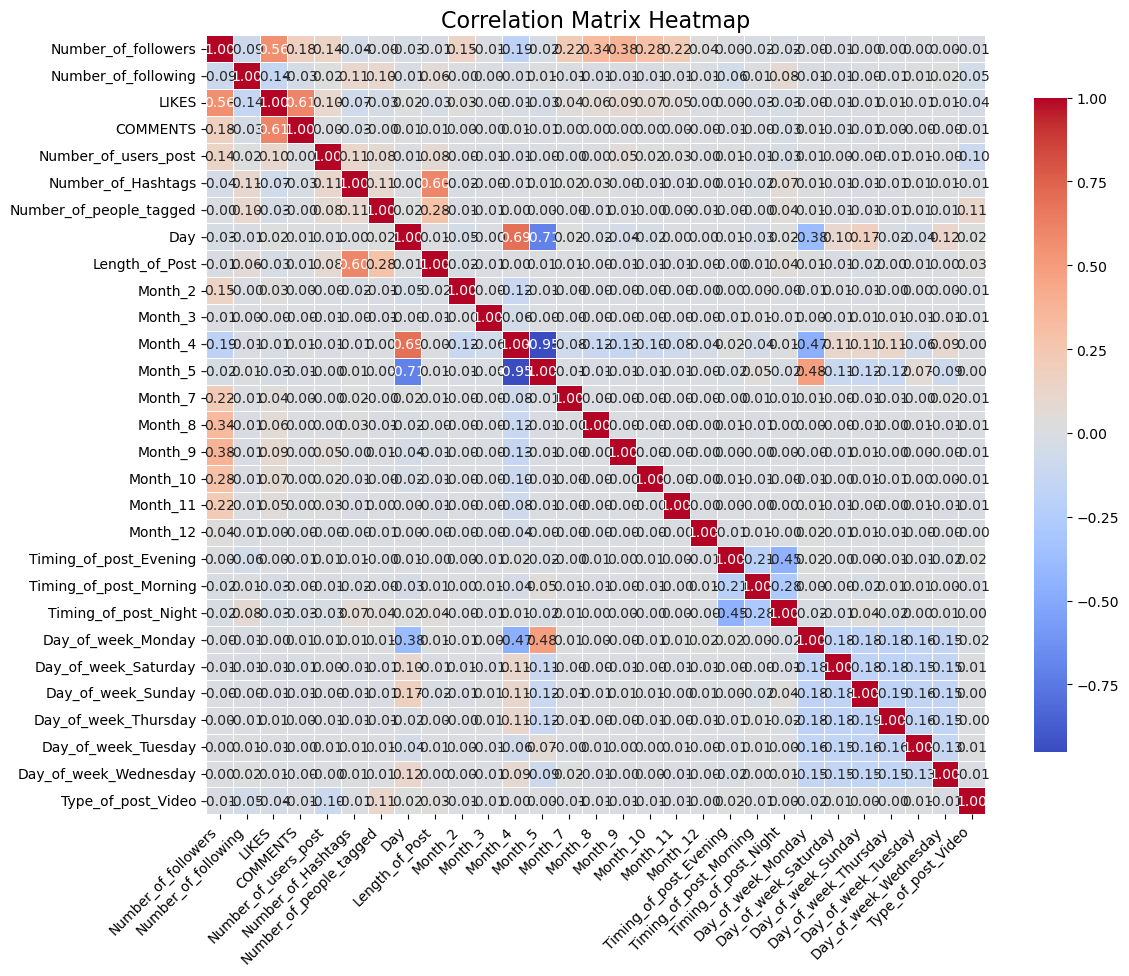

In [26]:
#Heatmap for corelation matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Select only numeric columns
numeric_columns = Instagram.select_dtypes(include=['number'])

# Calculate the correlation matrix
correlation_matrix = numeric_columns.corr()

# Set the figure size
plt.figure(figsize=(12, 10))

# Create the heatmap
sns.heatmap(correlation_matrix, 
            annot=True,        # Display correlation values
            fmt='.2f',         # Format correlation values
            cmap='coolwarm',   # Color map
            square=True,       # Square cells for clarity
            linewidths=0.5,    # Add lines between cells
            cbar_kws={'shrink': 0.8})  # Shrink color bar

# Add titles and labels
plt.title('Correlation Matrix Heatmap', fontsize=16)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()

# Show the plot
plt.show()


QUESTION 1 - REGRESSION

In [28]:
# Import the variance inflation factor (VIF) function from the statsmodels library
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant


# 'X' contains the independent variables
X = Instagram[['Number_of_followers', 'Number_of_following', 'Number_of_people_tagged', 
                 'Number_of_users_post', 'Length_of_Post', 'Day_of_week_Monday', 'Day_of_week_Saturday', 'Day_of_week_Sunday', 
                 'Day_of_week_Thursday', 'Day_of_week_Tuesday', 'Day_of_week_Wednesday', 
                 'Number_of_Hashtags', 'Timing_of_post_Evening', 
                 'Timing_of_post_Morning', 'Timing_of_post_Night', 'Month_2', 'Month_3', 
                 'Month_4', 'Month_5', 'Month_7', 'Month_8', 'Month_9', 'Month_10', 
                 'Month_11', 'Month_12', 'Type_of_post_Video', 'LIKES', 'COMMENTS']]
# Add a constant term to the model for the intercept
X = add_constant(X)

# Calculate VIF for each feature
vif_data = pd.DataFrame()
vif_data["Feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

print(vif_data)

                    Feature          VIF
0                     const  1550.811504
1       Number_of_followers     3.806559
2       Number_of_following     1.057399
3   Number_of_people_tagged     1.124381
4      Number_of_users_post     1.067361
5            Length_of_Post     1.705673
6        Day_of_week_Monday     2.027501
7      Day_of_week_Saturday     1.669622
8        Day_of_week_Sunday     1.712132
9      Day_of_week_Thursday     1.706849
10      Day_of_week_Tuesday     1.588195
11    Day_of_week_Wednesday     1.525003
12       Number_of_Hashtags     1.628749
13   Timing_of_post_Evening     1.504319
14   Timing_of_post_Morning     1.304102
15     Timing_of_post_Night     1.579321
16                  Month_2     2.511388
17                  Month_3     1.389137
18                  Month_4   102.949986
19                  Month_5    95.466193
20                  Month_7     1.608334
21                  Month_8     2.417677
22                  Month_9     2.814289
23              

In [29]:
#Removed month 4 and month 5 as the multi colinearity was extremely high

In [30]:
#unstandrize regression for likes
# Import the necessary libraries
import statsmodels.api as sm
from statsmodels.tools.tools import add_constant

# Define the dependent variable (DV)
DV = Instagram['LIKES']  

# Define the independent variables (IVs)
IVs = Instagram[['Number_of_followers', 'Number_of_following', 'Number_of_people_tagged', 
                 'Number_of_users_post', 'Length_of_Post', 'Day_of_week_Monday', 'Day_of_week_Saturday', 'Day_of_week_Sunday', 
                 'Day_of_week_Thursday', 'Day_of_week_Tuesday', 'Day_of_week_Wednesday', 
                 'Number_of_Hashtags', 'Timing_of_post_Evening', 
                 'Timing_of_post_Morning', 'Timing_of_post_Night', 'Month_2', 'Month_3', 'Month_7', 'Month_8', 'Month_9', 'Month_10', 
                 'Month_11', 'Month_12', 'Type_of_post_Video']]


# Add a constant to the model (for the intercept)
IVs_with_const = sm.add_constant(IVs)

# Fit the linear regression model
model = sm.OLS(DV, IVs_with_const).fit()

# Get the summary of the regression results
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:                  LIKES   R-squared:                       0.416
Model:                            OLS   Adj. R-squared:                  0.415
Method:                 Least Squares   F-statistic:                     583.4
Date:                Wed, 11 Dec 2024   Prob (F-statistic):               0.00
Time:                        23:11:13   Log-Likelihood:            -1.9240e+05
No. Observations:               19681   AIC:                         3.849e+05
Df Residuals:                   19656   BIC:                         3.851e+05
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

In [31]:
#standaridzed regression for likes
from scipy.stats.mstats import zscore

# Define the dependent variable (DV) and independent variables (IVs)
IVs = Instagram[['Number_of_followers', 'Number_of_following', 'Number_of_people_tagged', 
                 'Number_of_users_post', 'Length_of_Post', 'Day_of_week_Monday', 'Day_of_week_Saturday', 'Day_of_week_Sunday', 
                 'Day_of_week_Thursday', 'Day_of_week_Tuesday', 'Day_of_week_Wednesday', 
                 'Number_of_Hashtags', 'Timing_of_post_Evening', 
                 'Timing_of_post_Morning', 'Timing_of_post_Night', 'Month_2', 'Month_3', 'Month_7', 'Month_8', 'Month_9', 'Month_10', 
                 'Month_11', 'Month_12', 'Type_of_post_Video']]

DV = Instagram[['LIKES']]

# Standardize the dependent variable (DV) and independent variables (IVs)
DV_standardized = zscore(DV)
IVs_standardized = zscore(IVs)

# Add a constant to the standardized independent variables
IVs_with_const = sm.add_constant(IVs_standardized)

# Fit the OLS model using Statsmodels
standardized_model = sm.OLS(DV_standardized, IVs_with_const).fit()

# Get the summary of the regression results
print(standardized_model.summary())

                            OLS Regression Results                            
Dep. Variable:                  LIKES   R-squared:                       0.416
Model:                            OLS   Adj. R-squared:                  0.415
Method:                 Least Squares   F-statistic:                     583.4
Date:                Wed, 11 Dec 2024   Prob (F-statistic):               0.00
Time:                        23:11:13   Log-Likelihood:                -22633.
No. Observations:               19681   AIC:                         4.532e+04
Df Residuals:                   19656   BIC:                         4.551e+04
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                   -1

In [32]:
#unstandaridze #
# Import the necessary libraries
import statsmodels.api as sm
from statsmodels.tools.tools import add_constant

# Define the dependent variable (DV)
DV = Instagram['COMMENTS']  

# Define the independent variables (IVs)
IVs = Instagram[['Number_of_followers', 'Number_of_following', 'Number_of_people_tagged', 
                 'Number_of_users_post', 'Length_of_Post', 'Day_of_week_Monday', 'Day_of_week_Saturday', 'Day_of_week_Sunday', 
                 'Day_of_week_Thursday', 'Day_of_week_Tuesday', 'Day_of_week_Wednesday', 
                 'Number_of_Hashtags', 'Timing_of_post_Evening', 
                 'Timing_of_post_Morning', 'Timing_of_post_Night', 'Month_2', 'Month_3', 'Month_7', 'Month_8', 'Month_9', 'Month_10', 
                 'Month_11', 'Month_12', 'Type_of_post_Video']]


# Add a constant to the model (for the intercept)
IVs_with_const = sm.add_constant(IVs)

# Fit the linear regression model
model = sm.OLS(DV, IVs_with_const).fit()

# Get the summary of the regression results
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:               COMMENTS   R-squared:                       0.064
Model:                            OLS   Adj. R-squared:                  0.063
Method:                 Least Squares   F-statistic:                     55.85
Date:                Wed, 11 Dec 2024   Prob (F-statistic):          4.06e-259
Time:                        23:11:13   Log-Likelihood:            -1.4742e+05
No. Observations:               19681   AIC:                         2.949e+05
Df Residuals:                   19656   BIC:                         2.951e+05
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

In [33]:
#standardized regression for comments
from scipy.stats.mstats import zscore

# Define the dependent variable (DV) and independent variables (IVs)
IVs = Instagram[['Number_of_followers', 'Number_of_following', 'Number_of_people_tagged', 
                 'Number_of_users_post', 'Length_of_Post', 'Day_of_week_Monday', 'Day_of_week_Saturday', 'Day_of_week_Sunday', 
                 'Day_of_week_Thursday', 'Day_of_week_Tuesday', 'Day_of_week_Wednesday', 
                 'Number_of_Hashtags', 'Timing_of_post_Evening', 
                 'Timing_of_post_Morning', 'Timing_of_post_Night', 'Month_2', 'Month_3', 'Month_7', 'Month_8', 'Month_9', 'Month_10', 
                 'Month_11', 'Month_12', 'Type_of_post_Video']]
DV = Instagram[['COMMENTS']]

# Standardize the dependent variable (DV) and independent variables (IVs)
DV_standardized = zscore(DV)
IVs_standardized = zscore(IVs)

# Add a constant to the standardized independent variables
IVs_with_const = sm.add_constant(IVs_standardized)

# Fit the OLS model using Statsmodels
standardized_model = sm.OLS(DV_standardized, IVs_with_const).fit()

# Get the summary of the regression results
print(standardized_model.summary())

                            OLS Regression Results                            
Dep. Variable:               COMMENTS   R-squared:                       0.064
Model:                            OLS   Adj. R-squared:                  0.063
Method:                 Least Squares   F-statistic:                     55.85
Date:                Wed, 11 Dec 2024   Prob (F-statistic):          4.06e-259
Time:                        23:11:14   Log-Likelihood:                -27277.
No. Observations:               19681   AIC:                         5.460e+04
Df Residuals:                   19656   BIC:                         5.480e+04
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                    1

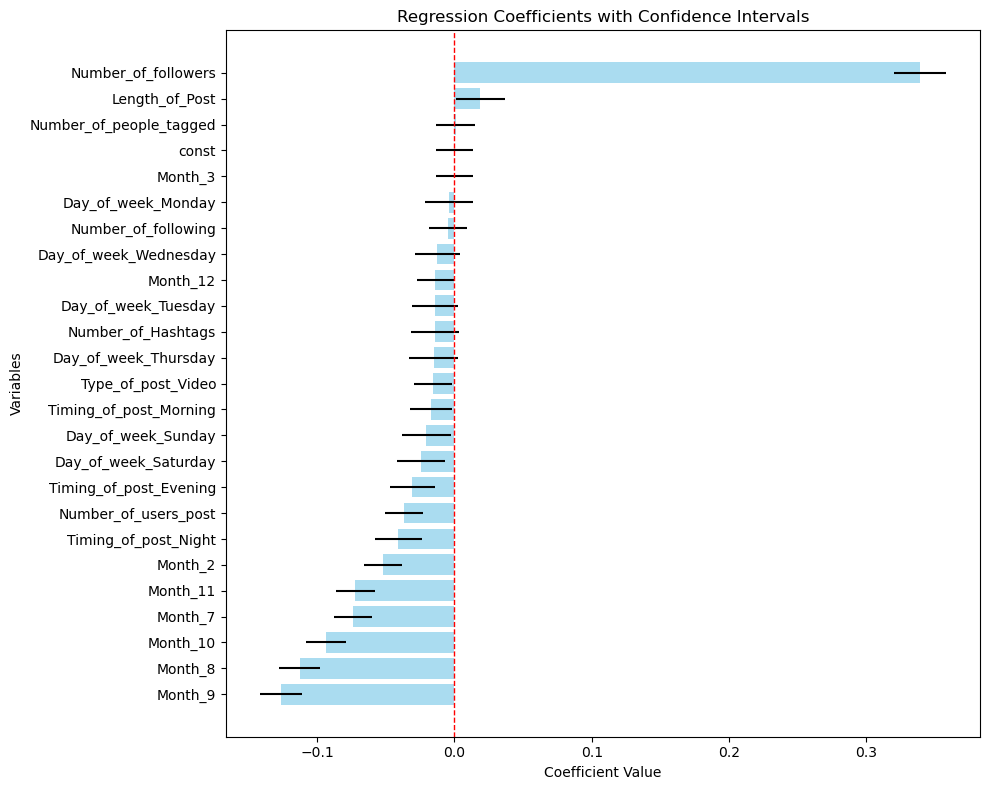

In [34]:
#Plot of regression coefficients with confidence intervals
import matplotlib.pyplot as plt
import pandas as pd

# Extract coefficients and confidence intervals
coefficients = standardized_model.params
conf_int = standardized_model.conf_int()
conf_int.columns = ['lower_bound', 'upper_bound']
conf_int['coef'] = coefficients

# Sort by coefficient size for clarity
conf_int = conf_int.sort_values('coef', ascending=True)

# Plot
plt.figure(figsize=(10, 8))
plt.barh(conf_int.index, conf_int['coef'], xerr=(conf_int['upper_bound'] - conf_int['lower_bound']) / 2, color='skyblue', alpha=0.7)
plt.axvline(x=0, color='red', linestyle='--', linewidth=1)
plt.title('Regression Coefficients with Confidence Intervals')
plt.xlabel('Coefficient Value')
plt.ylabel('Variables')
plt.tight_layout()
plt.show()


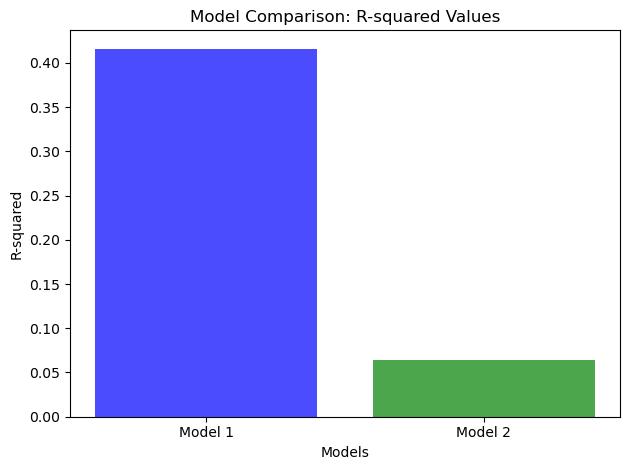

In [35]:
#R square comparison
models = ['Model 1', 'Model 2']
r_squared_values = [0.416, 0.064]  # Replace with actual R-squared values

plt.bar(models, r_squared_values, color=['blue', 'green'], alpha=0.7)
plt.title('Model Comparison: R-squared Values')
plt.ylabel('R-squared')
plt.xlabel('Models')
plt.tight_layout()
plt.show()


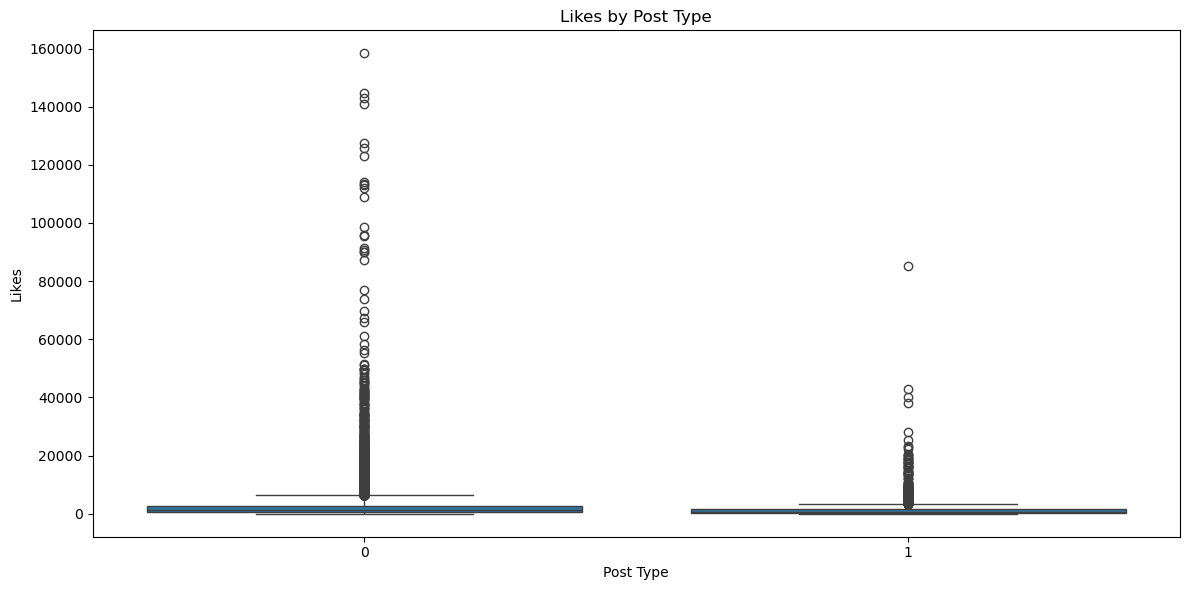

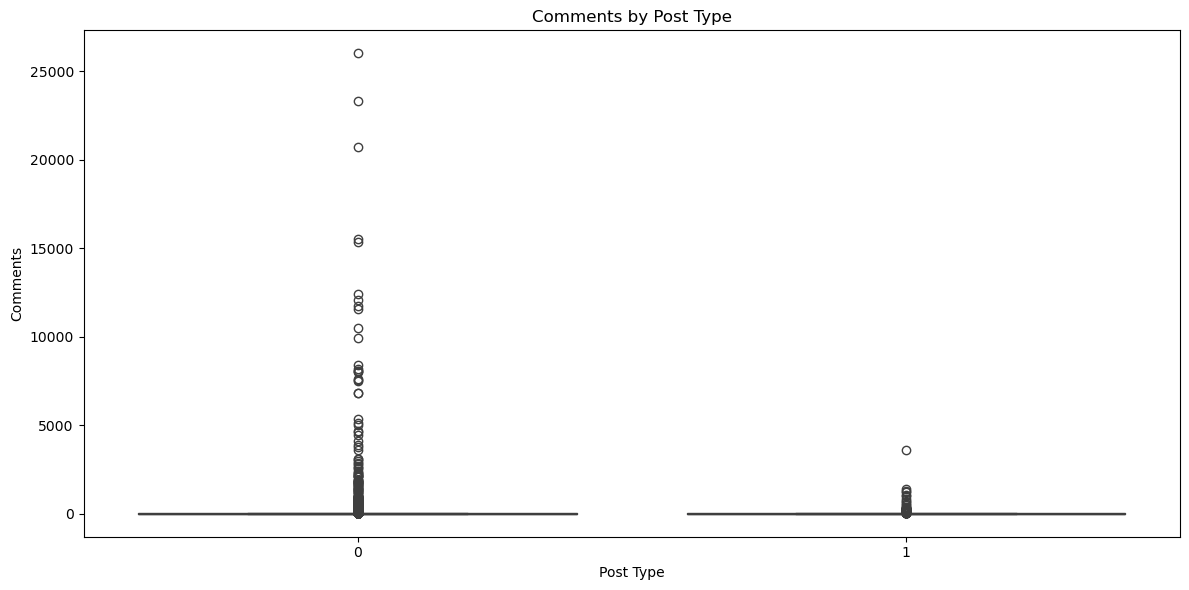

In [36]:
# Example: Boxplot for Likes and Comments by Post Type- Video
plt.figure(figsize=(12, 6))
sns.boxplot(x='Type_of_post_Video', y='LIKES', data=Instagram)
plt.title('Likes by Post Type')
plt.xlabel('Post Type')
plt.ylabel('Likes')
plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 6))
sns.boxplot(x='Type_of_post_Video', y='COMMENTS', data=Instagram)
plt.title('Comments by Post Type')
plt.xlabel('Post Type')
plt.ylabel('Comments')
plt.tight_layout()
plt.show()

STANDERDIZED BETA

In [38]:
import statsmodels.api as sm
from scipy.stats.mstats import zscore

def run_standardized_regression(DV_column, IV_columns):
    # Standardize the dependent variable (DV) and independent variables (IVs)
    DV_standardized = zscore(DV_column)
    IVs_standardized = zscore(IV_columns)

    # Add a constant to the standardized independent variables
    IVs_with_const = sm.add_constant(IVs_standardized)

    # Fit the OLS model using Statsmodels
    standardized_model = sm.OLS(DV_standardized, IVs_with_const).fit()

    # Get the coefficients (standardized betas) from the regression
    standardized_betas = standardized_model.params[1:]  # Excluding the intercept (constant)

    # Sort the standardized betas by their absolute value
    sorted_betas = standardized_betas.abs().sort_values(ascending=False)

    # Return the sorted betas
    return standardized_model.summary(), sorted_betas

# Example usage for Likes and Comments
# For Likes (DV: 'LIKES', IVs: other features excluding LIKES)
likes_summary, likes_sorted_betas = run_standardized_regression(
    Instagram[['LIKES']], 
    Instagram[['Number_of_followers', 'Number_of_following', 'Number_of_people_tagged', 
               'Number_of_users_post', 'Length_of_Post', 'Day_of_week_Monday', 
               'Day_of_week_Saturday', 'Day_of_week_Sunday', 'Day_of_week_Thursday', 
               'Day_of_week_Tuesday', 'Day_of_week_Wednesday', 'Number_of_Hashtags', 
               'Length_of_Post', 'Timing_of_post_Evening', 'Timing_of_post_Morning', 
               'Timing_of_post_Night', 'Month_2', 'Month_3', 'Month_7', 'Month_8', 'Month_9', 'Month_10', 
               'Month_11', 'Month_12', 'Type_of_post_Video', 'COMMENTS']]
)

# For Comments (DV: 'COMMENTS', IVs: other features excluding COMMENTS)
comments_summary, comments_sorted_betas = run_standardized_regression(
    Instagram[['COMMENTS']], 
    Instagram[['Number_of_followers', 'Number_of_following', 'Number_of_people_tagged', 
               'Number_of_users_post', 'Length_of_Post', 'Day_of_week_Monday', 
               'Day_of_week_Saturday', 'Day_of_week_Sunday', 'Day_of_week_Thursday', 
               'Day_of_week_Tuesday', 'Day_of_week_Wednesday', 'Number_of_Hashtags', 
               'Length_of_Post', 'Timing_of_post_Evening', 'Timing_of_post_Morning', 
               'Timing_of_post_Night', 'Month_2', 'Month_3', 'Month_7', 'Month_8', 'Month_9', 'Month_10', 
               'Month_11', 'Month_12', 'Type_of_post_Video']]
)

# Print the regression summaries for Likes and Comments
print("Likes Regression Summary:")
print(likes_summary)

print("\nSorted Beta Coefficients for Likes:")
print(likes_sorted_betas)

print("\nComments Regression Summary:")
print(comments_summary)

print("\nSorted Beta Coefficients for Comments:")
print(comments_sorted_betas)


Likes Regression Summary:
                            OLS Regression Results                            
Dep. Variable:                  LIKES   R-squared:                       0.637
Model:                            OLS   Adj. R-squared:                  0.637
Method:                 Least Squares   F-statistic:                     1380.
Date:                Wed, 11 Dec 2024   Prob (F-statistic):               0.00
Time:                        23:11:14   Log-Likelihood:                -17953.
No. Observations:               19681   AIC:                         3.596e+04
Df Residuals:                   19655   BIC:                         3.616e+04
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------


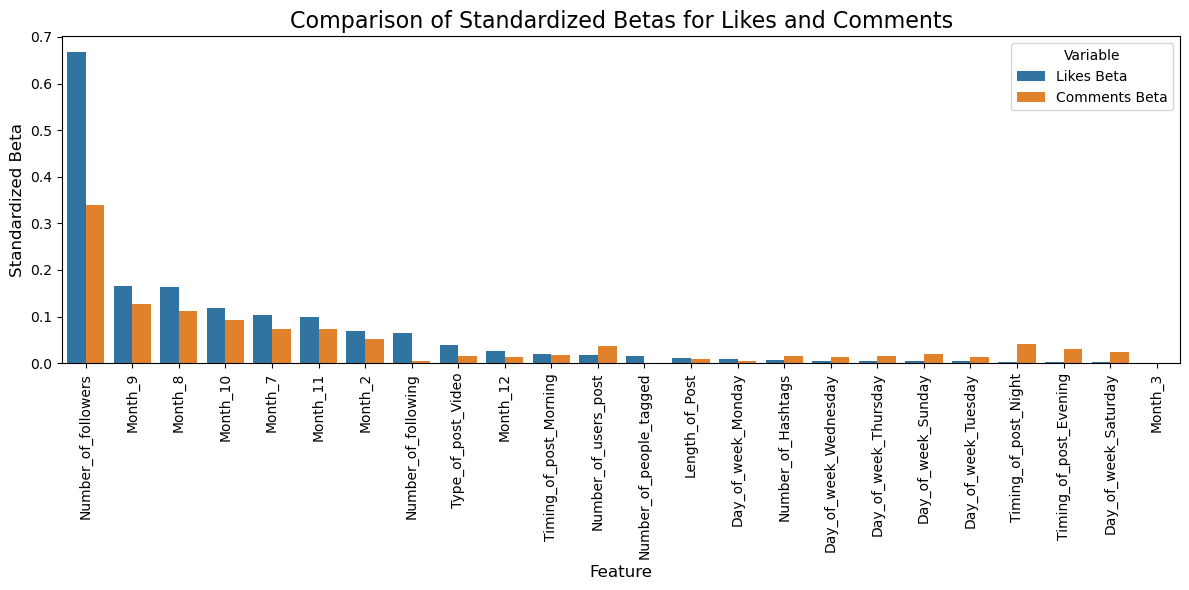

In [39]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

def plot_standardized_betas(likes_sorted_betas, comments_sorted_betas):
    # Ensure that there are no duplicates in the index
    likes_sorted_betas = likes_sorted_betas[~likes_sorted_betas.index.duplicated()]
    comments_sorted_betas = comments_sorted_betas[~comments_sorted_betas.index.duplicated()]

    # Align indices of likes_sorted_betas and comments_sorted_betas for comparison
    common_features = likes_sorted_betas.index.intersection(comments_sorted_betas.index)
    likes_betas = likes_sorted_betas[common_features]
    comments_betas = comments_sorted_betas[common_features]

    # Create a DataFrame to combine the results
    combined_betas = pd.DataFrame({
        'Feature': likes_betas.index,
        'Likes Beta': likes_betas.values,
        'Comments Beta': comments_betas.values
    })

    # Melt the data for easier plotting with seaborn
    combined_betas_melted = combined_betas.melt(id_vars='Feature', value_vars=['Likes Beta', 'Comments Beta'],
                                               var_name='Variable', value_name='Standardized Beta')

    # Set plot size
    plt.figure(figsize=(12, 6))

    # Create a barplot to compare the standardized betas
    sns.barplot(x='Feature', y='Standardized Beta', hue='Variable', data=combined_betas_melted)

    # Rotate x-axis labels for readability
    plt.xticks(rotation=90)

    # Title and labels
    plt.title('Comparison of Standardized Betas for Likes and Comments', fontsize=16)
    plt.xlabel('Feature', fontsize=12)
    plt.ylabel('Standardized Beta', fontsize=12)

    # Show plot
    plt.tight_layout()
    plt.show()

# Example usage:
plot_standardized_betas(likes_sorted_betas, comments_sorted_betas)


QUESTION 2

In [41]:
#variable 1: Counting the number of emojis from the text column
import re

# Count the number of emojis in the post's caption
Instagram['emoji_count'] = Instagram['TEXT'].apply(lambda x: len(re.findall(r'[^\w\s,]', x)))
print(Instagram['emoji_count'])

0         2
1        13
2         7
3         9
4        10
         ..
19676    10
19677     9
19678    14
19679    11
19680     9
Name: emoji_count, Length: 19681, dtype: int64


In [42]:
#Variable 2: The number of tags used from the list of tags
Instagram['Tag_Usage'] = Instagram['list_of_tags'].apply(lambda x: len(set(str(x).split())) if isinstance(x, str) else 0)
Instagram['Tag_Usage']

0        2
1        3
2        7
3        2
4        4
        ..
19676    3
19677    3
19678    5
19679    4
19680    2
Name: Tag_Usage, Length: 19681, dtype: int64

In [43]:
#Variable 3: The number of URLs used in the texts
Instagram['Has_URL'] = Instagram['TEXT'].str.contains('http', case=False).astype(int)


In [44]:
#Variable 4: Post_Activity_Intensity: No. of people tagged / Lenghth of post
import pandas as pd

# Check for zeros or NaNs in 'Length_of_Post' and 'Number_of_people_tagged'
print(Instagram[Instagram['Length_of_Post'] == 0].shape)  # Check for zero lengths
print(Instagram[Instagram['Length_of_Post'].isna()].shape)  # Check for NaNs
print(Instagram[Instagram['Number_of_people_tagged'].isna()].shape)  # Check for NaNs in people tagged

# Remove rows where 'Length_of_Post' is zero or NaN
Instagram = Instagram[Instagram['Length_of_Post'] > 0]
Instagram = Instagram.dropna(subset=['Number_of_people_tagged', 'Length_of_Post'])

# Create the 'Post Activity Intensity' variable
Instagram['Post_Activity_Intensity'] = Instagram['Number_of_people_tagged'] / Instagram['Length_of_Post']

# Check the first few rows to ensure the variable is created correctly
print(Instagram[['Number_of_people_tagged', 'Length_of_Post', 'Post_Activity_Intensity']].head())


(6, 38)
(0, 38)
(0, 38)
   Number_of_people_tagged  Length_of_Post  Post_Activity_Intensity
0                        0              56                 0.000000
1                        0              64                 0.000000
2                        0              60                 0.000000
3                        2             103                 0.019417
4                        0              91                 0.000000


In [45]:
import pandas as pd

# Convert the column names to strings (you mentioned this step already)
Instagram.columns = Instagram.columns.astype(str)

# Select the relevant columns for the correlation matrix based on the variable names you provided
columns_for_correlation_matrix = Instagram[['Number_of_followers', 'Number_of_following', 'Number_of_people_tagged', 
                                             'Number_of_users_post', 'LIKES', 'COMMENTS', 
                                             'Day_of_week_Monday', 'Day_of_week_Saturday', 'Day_of_week_Sunday', 
                                             'Day_of_week_Thursday', 'Day_of_week_Tuesday', 'Day_of_week_Wednesday', 
                                             'Number_of_Hashtags', 'Length_of_Post', 
                                             'Timing_of_post_Evening', 'Timing_of_post_Morning', 'Timing_of_post_Night', 
                                             'Month_2', 'Month_3', 'Month_7', 'Month_8', 
                                             'Month_9', 'Month_10', 'Month_11', 'Month_12', 'Type_of_post_Video','emoji_count', 'Has_URL', 'Tag_Usage', 'Post_Activity_Intensity']]

# Calculate the correlation matrix
correlation_matrix = columns_for_correlation_matrix.corr()

# Print the correlation matrix
correlation_matrix


,Number_of_followers,Number_of_following,Number_of_people_tagged,Number_of_users_post,LIKES,COMMENTS,Day_of_week_Monday,Day_of_week_Saturday,Day_of_week_Sunday,Day_of_week_Thursday,...,Month_8,Month_9,Month_10,Month_11,Month_12,Type_of_post_Video,emoji_count,Has_URL,Tag_Usage,Post_Activity_Intensity
Number_of_followers,1.000000,-0.093496,-0.000932,0.145211,0.559094,0.184677,-0.000598,-0.009403,-0.003271,0.001990,...,0.305785,0.385464,0.287220,0.222446,0.039529,-0.007427,0.009981,-0.023983,-0.041973,0.027805
Number_of_following,-0.093496,1.000000,0.102484,0.021503,-0.138702,-0.034590,-0.012990,-0.007723,-0.003349,-0.005995,...,-0.007506,-0.009462,-0.007050,-0.005460,-0.005398,-0.054276,0.017522,-0.004347,0.107616,0.118434
Number_of_people_tagged,-0.000932,0.102484,1.000000,0.076426,-0.029209,-0.000064,0.012395,-0.009782,-0.010824,-0.011697,...,-0.010458,0.005201,-0.002006,0.000677,-0.005244,0.110804,0.240419,-0.013103,0.103348,0.620531
Number_of_users_post,0.145211,0.021503,0.076426,1.000000,0.100910,0.003853,0.008608,0.001507,-0.001916,-0.005710,...,0.002451,0.051475,0.021403,0.025918,-0.001800,-0.099426,0.077220,-0.018553,0.108342,0.078807
LIKES,0.559094,-0.138702,-0.029209,0.100910,1.000000,0.610197,-0.004349,-0.010053,-0.008774,0.010936,...,0.050739,0.091893,0.074824,0.051140,0.001028,-0.042543,-0.026635,-0.028600,-0.067201,-0.016069
COMMENTS,0.184677,-0.034590,-0.000064,0.003853,0.610197,1.000000,0.010403,-0.014257,-0.010584,0.001576,...,0.001332,0.001587,0.002781,0.001887,-0.000124,-0.010130,-0.008861,-0.006261,-0.025860,-0.004831
Day_of_week_Monday,-0.000598,-0.012990,0.012395,0.008608,-0.004349,0.010403,1.000000,-0.175738,-0.183825,-0.183267,...,0.002069,-0.004154,-0.006521,0.010871,0.017764,-0.021536,0.008592,0.013863,0.009406,0.000028
Day_of_week_Saturday,-0.009403,-0.007723,-0.009782,0.001507,-0.010053,-0.014257,-0.175738,1.000000,-0.181271,-0.180720,...,-0.007366,-0.007693,-0.001118,-0.008905,-0.005141,0.011181,-0.005745,-0.008197,-0.006441,-0.007286
Day_of_week_Sunday,-0.003271,-0.003349,-0.010824,-0.001916,-0.008774,-0.010584,-0.183825,-0.181271,1.000000,-0.189037,...,-0.008079,0.010114,0.008095,-0.002822,0.005868,0.004200,-0.008676,-0.006916,-0.012360,-0.012252
Day_of_week_Thursday,0.001990,-0.005995,-0.011697,-0.005710,0.010936,0.001576,-0.183267,-0.180720,-0.189037,1.000000,...,0.001441,-0.001058,-0.006950,-0.002780,-0.005361,-0.000261,-0.003347,-0.009525,-0.009453,-0.003789


In [46]:
#Unstanderdized regression for likes
# Import the necessary libraries
import statsmodels.api as sm
from statsmodels.tools.tools import add_constant

# Define the dependent variable (DV)
DV = Instagram['LIKES']  

# Define the independent variables (IVs)
IVs = Instagram[['Number_of_followers', 'Number_of_following', 'Number_of_people_tagged', 
                                             'Number_of_users_post', 'Length_of_Post',  
                                             'Day_of_week_Monday', 'Day_of_week_Saturday', 'Day_of_week_Sunday', 
                                             'Day_of_week_Thursday', 'Day_of_week_Tuesday', 'Day_of_week_Wednesday', 
                                             'Number_of_Hashtags',
                                             'Timing_of_post_Evening', 'Timing_of_post_Morning', 'Timing_of_post_Night', 
                                             'Month_2', 'Month_3','Month_7', 'Month_8', 
                                             'Month_9', 'Month_10', 'Month_11', 'Month_12', 'Type_of_post_Video', 'emoji_count', 'Post_Activity_Intensity', 'Has_URL']]
                                               


# Add a constant to the model (for the intercept)
IVs_with_const = sm.add_constant(IVs)

# Fit the linear regression model
model = sm.OLS(DV, IVs_with_const).fit()

# Get the summary of the regression results
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:                  LIKES   R-squared:                       0.417
Model:                            OLS   Adj. R-squared:                  0.416
Method:                 Least Squares   F-statistic:                     520.3
Date:                Wed, 11 Dec 2024   Prob (F-statistic):               0.00
Time:                        23:11:15   Log-Likelihood:            -1.9231e+05
No. Observations:               19675   AIC:                         3.847e+05
Df Residuals:                   19647   BIC:                         3.849e+05
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

In [47]:
#standaridzed regression for likes
from scipy.stats.mstats import zscore

# Define the dependent variable (DV) and independent variables (IVs)
IVs = Instagram[['Number_of_followers', 'Number_of_following', 'Number_of_people_tagged', 
                                             'Number_of_users_post',  
                                            'Day_of_week_Monday', 'Day_of_week_Saturday', 'Day_of_week_Sunday', 
                                             'Day_of_week_Thursday', 'Day_of_week_Tuesday', 'Day_of_week_Wednesday', 
                                             'Number_of_Hashtags', 'Length_of_Post', 
                                             'Timing_of_post_Evening', 'Timing_of_post_Morning', 'Timing_of_post_Night', 
                                             'Month_2', 'Month_3', 'Month_7', 'Month_8', 
                                             'Month_9', 'Month_10', 'Month_11', 'Month_12', 'Type_of_post_Video','emoji_count', 'Post_Activity_Intensity', 'Has_URL']]
DV = Instagram[['LIKES']]

# Standardize the dependent variable (DV) and independent variables (IVs)
DV_standardized = zscore(DV)
IVs_standardized = zscore(IVs)

# Add a constant to the standardized independent variables
IVs_with_const = sm.add_constant(IVs_standardized)

# Fit the OLS model using Statsmodels
standardized_model = sm.OLS(DV_standardized, IVs_with_const).fit()

# Get the summary of the regression results
print(standardized_model.summary())

                            OLS Regression Results                            
Dep. Variable:                  LIKES   R-squared:                       0.417
Model:                            OLS   Adj. R-squared:                  0.416
Method:                 Least Squares   F-statistic:                     520.3
Date:                Wed, 11 Dec 2024   Prob (F-statistic):               0.00
Time:                        23:11:15   Log-Likelihood:                -22611.
No. Observations:               19675   AIC:                         4.528e+04
Df Residuals:                   19647   BIC:                         4.550e+04
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                    1

In [48]:
#Unstanderdized regression for comments
# Import the necessary libraries
import statsmodels.api as sm
from statsmodels.tools.tools import add_constant

# Define the dependent variable (DV)
DV = Instagram['COMMENTS']  

# Define the independent variables (IVs)
IVs = Instagram[['Number_of_followers', 'Number_of_following', 'Number_of_people_tagged', 
                                             'Number_of_users_post', 'Length_of_Post',  
                                             'Day_of_week_Monday', 'Day_of_week_Saturday', 'Day_of_week_Sunday', 
                                             'Day_of_week_Thursday', 'Day_of_week_Tuesday', 'Day_of_week_Wednesday', 
                                             'Number_of_Hashtags', 'Length_of_Post', 
                                             'Timing_of_post_Evening', 'Timing_of_post_Morning', 'Timing_of_post_Night', 
                                             'Month_2', 'Month_3', 'Month_7', 'Month_8', 
                                             'Month_9', 'Month_10', 'Month_11', 'Month_12', 'Type_of_post_Video', 'emoji_count', 'Post_Activity_Intensity', 'Has_URL']]


# Add a constant to the model (for the intercept)
IVs_with_const = sm.add_constant(IVs)

# Fit the linear regression model
model = sm.OLS(DV, IVs_with_const).fit()

# Get the summary of the regression results
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:               COMMENTS   R-squared:                       0.064
Model:                            OLS   Adj. R-squared:                  0.063
Method:                 Least Squares   F-statistic:                     50.04
Date:                Wed, 11 Dec 2024   Prob (F-statistic):          1.10e-258
Time:                        23:11:15   Log-Likelihood:            -1.4738e+05
No. Observations:               19675   AIC:                         2.948e+05
Df Residuals:                   19647   BIC:                         2.950e+05
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

In [49]:
#standaridzed regression for comments
from scipy.stats.mstats import zscore

# Define the dependent variable (DV) and independent variables (IVs)
IVs = Instagram[['Number_of_followers', 'Number_of_following', 'Number_of_people_tagged', 
                                             'Number_of_users_post', 
                                             'Day_of_week_Monday', 'Day_of_week_Saturday', 'Day_of_week_Sunday', 
                                             'Day_of_week_Thursday', 'Day_of_week_Tuesday', 'Day_of_week_Wednesday', 
                                             'Number_of_Hashtags', 'Length_of_Post', 
                                             'Timing_of_post_Evening', 'Timing_of_post_Morning', 'Timing_of_post_Night', 
                                             'Month_2', 'Month_3', 'Month_7', 'Month_8', 
                                             'Month_9', 'Month_10', 'Month_11', 'Month_12', 'Type_of_post_Video', 'emoji_count', 'Post_Activity_Intensity', 'Has_URL']]
DV = Instagram[['COMMENTS']]

# Standardize the dependent variable (DV) and independent variables (IVs)
DV_standardized = zscore(DV)
IVs_standardized = zscore(IVs)

# Add a constant to the standardized independent variables
IVs_with_const = sm.add_constant(IVs_standardized)

# Fit the OLS model using Statsmodels
standardized_model = sm.OLS(DV_standardized, IVs_with_const).fit()

# Get the summary of the regression results
print(standardized_model.summary())

                            OLS Regression Results                            
Dep. Variable:               COMMENTS   R-squared:                       0.064
Model:                            OLS   Adj. R-squared:                  0.063
Method:                 Least Squares   F-statistic:                     50.04
Date:                Wed, 11 Dec 2024   Prob (F-statistic):          1.10e-258
Time:                        23:11:15   Log-Likelihood:                -27263.
No. Observations:               19675   AIC:                         5.458e+04
Df Residuals:                   19647   BIC:                         5.480e+04
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                   -3

QUESTION 3

In [51]:
# Add the 'IsWeekend' column by checking if the day corresponds to Saturday or Sunday
Instagram['IsWeekend'] = (
    Instagram['Day_of_week_Saturday'] + Instagram['Day_of_week_Sunday']
).apply(lambda x: 1 if x > 0 else 0)

# Display the 'IsWeekend' column
print(Instagram['IsWeekend'])


0        1
1        1
2        0
3        0
4        0
        ..
19676    1
19677    1
19678    0
19679    0
19680    0
Name: IsWeekend, Length: 19675, dtype: int64


In [52]:
#Unstanderdized regression for likes
# Import the necessary libraries
import statsmodels.api as sm
from statsmodels.tools.tools import add_constant

# Define the dependent variable (DV)
DV = Instagram['LIKES']  

# Define the independent variables (IVs)
IVs = Instagram[['Number_of_followers', 'Number_of_following', 'Number_of_people_tagged', 
                                             'Number_of_users_post', 'Length_of_Post', 
                                             'Number_of_Hashtags', 
                                             'Timing_of_post_Evening', 'Timing_of_post_Morning', 'Timing_of_post_Night', 
                                             'Month_2', 'Month_3', 'Month_7', 'Month_8', 
                                             'Month_9', 'Month_10', 'Month_11', 'Month_12', 'Type_of_post_Video', 'IsWeekend']]


# Add a constant to the model (for the intercept)
IVs_with_const = sm.add_constant(IVs)

# Fit the linear regression model
model = sm.OLS(DV, IVs_with_const).fit()

# Get the summary of the regression results
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:                  LIKES   R-squared:                       0.415
Model:                            OLS   Adj. R-squared:                  0.415
Method:                 Least Squares   F-statistic:                     734.9
Date:                Wed, 11 Dec 2024   Prob (F-statistic):               0.00
Time:                        23:11:16   Log-Likelihood:            -1.9233e+05
No. Observations:               19675   AIC:                         3.847e+05
Df Residuals:                   19655   BIC:                         3.849e+05
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

In [53]:
#standaridzed regression for likes
from scipy.stats.mstats import zscore

# Define the dependent variable (DV) and independent variables (IVs)
IVs = Instagram[['Number_of_followers', 'Number_of_following', 'Number_of_people_tagged', 
                                             'Number_of_users_post', 'Length_of_Post', 
                                             'Number_of_Hashtags', 
                                             'Timing_of_post_Evening', 'Timing_of_post_Morning', 'Timing_of_post_Night', 
                                             'Month_2', 'Month_3', 'Month_7', 'Month_8', 
                                             'Month_9', 'Month_10', 'Month_11', 'Month_12', 'Type_of_post_Video', 'IsWeekend']]
DV = Instagram[['LIKES']]

# Standardize the dependent variable (DV) and independent variables (IVs)
DV_standardized = zscore(DV)
IVs_standardized = zscore(IVs)

# Add a constant to the standardized independent variables
IVs_with_const = sm.add_constant(IVs_standardized)

# Fit the OLS model using Statsmodels
standardized_model = sm.OLS(DV_standardized, IVs_with_const).fit()

# Get the summary of the regression results
print(standardized_model.summary())

                            OLS Regression Results                            
Dep. Variable:                  LIKES   R-squared:                       0.415
Model:                            OLS   Adj. R-squared:                  0.415
Method:                 Least Squares   F-statistic:                     734.9
Date:                Wed, 11 Dec 2024   Prob (F-statistic):               0.00
Time:                        23:11:16   Log-Likelihood:                -22638.
No. Observations:               19675   AIC:                         4.532e+04
Df Residuals:                   19655   BIC:                         4.547e+04
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                   -1

In [54]:
#Unstanderdized regression for comments
# Import the necessary libraries
import statsmodels.api as sm
from statsmodels.tools.tools import add_constant

# Define the dependent variable (DV)
DV = Instagram['COMMENTS']  

# Define the independent variables (IVs)
IVs = Instagram[['Number_of_followers', 'Number_of_following', 'Number_of_people_tagged', 
                                             'Number_of_users_post', 'Length_of_Post', 
                                             'Number_of_Hashtags',
                                             'Timing_of_post_Evening', 'Timing_of_post_Morning', 'Timing_of_post_Night', 
                                             'Month_2', 'Month_3', 'Month_7', 'Month_8', 
                                             'Month_9', 'Month_10', 'Month_11', 'Month_12', 'Type_of_post_Video', 'IsWeekend']]


# Add a constant to the model (for the intercept)
IVs_with_const = sm.add_constant(IVs)

# Fit the linear regression model
model = sm.OLS(DV, IVs_with_const).fit()

# Get the summary of the regression results
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:               COMMENTS   R-squared:                       0.064
Model:                            OLS   Adj. R-squared:                  0.063
Method:                 Least Squares   F-statistic:                     70.26
Date:                Wed, 11 Dec 2024   Prob (F-statistic):          1.76e-262
Time:                        23:11:16   Log-Likelihood:            -1.4738e+05
No. Observations:               19675   AIC:                         2.948e+05
Df Residuals:                   19655   BIC:                         2.950e+05
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

In [55]:
#standaridzed regression for comments
from scipy.stats.mstats import zscore

# Define the dependent variable (DV) and independent variables (IVs)
IVs = Instagram[['Number_of_followers', 'Number_of_following', 'Number_of_people_tagged', 
                                             'Number_of_users_post', 'Length_of_Post', 
                                             'Number_of_Hashtags', 
                                             'Timing_of_post_Evening', 'Timing_of_post_Morning', 'Timing_of_post_Night', 
                                             'Month_2', 'Month_3', 'Month_7', 'Month_8', 
                                             'Month_9', 'Month_10', 'Month_11', 'Month_12', 'Type_of_post_Video', 'IsWeekend']]
DV = Instagram[['COMMENTS']]

# Standardize the dependent variable (DV) and independent variables (IVs)
DV_standardized = zscore(DV)
IVs_standardized = zscore(IVs)

# Add a constant to the standardized independent variables
IVs_with_const = sm.add_constant(IVs_standardized)

# Fit the OLS model using Statsmodels
standardized_model = sm.OLS(DV_standardized, IVs_with_const).fit()

# Get the summary of the regression results
print(standardized_model.summary())

                            OLS Regression Results                            
Dep. Variable:               COMMENTS   R-squared:                       0.064
Model:                            OLS   Adj. R-squared:                  0.063
Method:                 Least Squares   F-statistic:                     70.26
Date:                Wed, 11 Dec 2024   Prob (F-statistic):          1.76e-262
Time:                        23:11:16   Log-Likelihood:                -27271.
No. Observations:               19675   AIC:                         5.458e+04
Df Residuals:                   19655   BIC:                         5.474e+04
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                   -4

QUESTION 4

In [57]:
micro_influencers = Instagram[Instagram['Number_of_followers'] < 50000]
macro_influencers = Instagram[Instagram['Number_of_followers'] >= 50000]

FOR MICROINFLUENCERS

In [59]:
#UNSTANDARIZED regression for likes
# Import the necessary libraries
import statsmodels.api as sm
from statsmodels.tools.tools import add_constant

# Define the dependent variable (DV)
DV = micro_influencers['LIKES']  

# Define the independent variables (IVs)
IVs = micro_influencers[['Number_of_followers', 'Number_of_following', 'Number_of_people_tagged', 
                                             'Number_of_users_post', 'Length_of_Post',  
                                             'Day_of_week_Monday', 'Day_of_week_Saturday', 'Day_of_week_Sunday', 
                                             'Day_of_week_Thursday', 'Day_of_week_Tuesday', 'Day_of_week_Wednesday', 
                                             'Number_of_Hashtags',
                                             'Timing_of_post_Evening', 'Timing_of_post_Morning', 'Timing_of_post_Night', 
                                             'Month_2', 'Month_3', 'Month_7', 'Month_8', 
                                             'Month_9', 'Month_10', 'Month_11', 'Month_12', 'Type_of_post_Video', 'emoji_count', 'Post_Activity_Intensity']]


# Add a constant to the model (for the intercept)
IVs_with_const = sm.add_constant(IVs)

# Fit the linear regression model
model = sm.OLS(DV, IVs_with_const).fit()

# Get the summary of the regression results
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:                  LIKES   R-squared:                       0.081
Model:                            OLS   Adj. R-squared:                  0.080
Method:                 Least Squares   F-statistic:                     55.33
Date:                Wed, 11 Dec 2024   Prob (F-statistic):          1.34e-222
Time:                        23:11:16   Log-Likelihood:            -1.1417e+05
No. Observations:               13134   AIC:                         2.284e+05
Df Residuals:                   13112   BIC:                         2.285e+05
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

In [60]:
#STANDARIZED regression for likes
from scipy.stats.mstats import zscore

# Define the dependent variable (DV) and independent variables (IVs)
IVs_clean = micro_influencers[['Number_of_followers', 'Number_of_following', 'Number_of_people_tagged', 
                                     'Number_of_users_post', 
                                     'Day_of_week_Monday', 'Day_of_week_Saturday', 'Day_of_week_Sunday', 
                                     'Day_of_week_Thursday', 'Day_of_week_Tuesday', 'Day_of_week_Wednesday', 
                                     'Number_of_Hashtags', 'Length_of_Post', 
                                     'Timing_of_post_Evening', 'Timing_of_post_Morning', 'Timing_of_post_Night', 
                                     'Month_2', 'Month_3', 'Month_7', 'Month_8', 
                                     'Month_9', 'Month_10', 'Month_11', 'Month_12', 'Type_of_post_Video', 
                                     'emoji_count', 'Post_Activity_Intensity']]
DV = micro_influencers['LIKES']

# Standardize the dependent variable (DV) and independent variables (IVs)
DV_standardized = zscore(DV)
IVs_standardized = zscore(IVs)

# Add a constant to the standardized independent variables
IVs_with_const = sm.add_constant(IVs_standardized)
IVs_with_const['Month_2'] = IVs_with_const['Month_2'].fillna(0)  # Replace NaN with 0
IVs_with_const['Month_3'] = IVs_with_const['Month_3'].fillna(0)
IVs_with_const['Month_7'] = IVs_with_const['Month_7'].fillna(0)
IVs_with_const['Month_8'] = IVs_with_const['Month_8'].fillna(0)
IVs_with_const['Month_9'] = IVs_with_const['Month_9'].fillna(0)
IVs_with_const['Month_10'] = IVs_with_const['Month_10'].fillna(0)
IVs_with_const['Month_11'] = IVs_with_const['Month_11'].fillna(0)
IVs_with_const['Month_12'] = IVs_with_const['Month_12'].fillna(0)
IVs_with_const['Type_of_post_Video'] = IVs_with_const['Type_of_post_Video'].fillna(0)
# Fit the OLS model using Statsmodels
standardized_model = sm.OLS(DV_standardized, IVs_with_const).fit()

# Get the summary of the regression results
print(standardized_model.summary())




                            OLS Regression Results                            
Dep. Variable:                  LIKES   R-squared:                       0.081
Model:                            OLS   Adj. R-squared:                  0.080
Method:                 Least Squares   F-statistic:                     55.33
Date:                Wed, 11 Dec 2024   Prob (F-statistic):          1.34e-222
Time:                        23:11:16   Log-Likelihood:                -18079.
No. Observations:               13134   AIC:                         3.620e+04
Df Residuals:                   13112   BIC:                         3.637e+04
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                   -2

In [61]:
#UNSTANDARIZED regression for comments
# Import the necessary libraries
import statsmodels.api as sm
from statsmodels.tools.tools import add_constant

# Define the dependent variable (DV)
DV = micro_influencers['COMMENTS']  

# Define the independent variables (IVs)
IVs = micro_influencers[['Number_of_followers', 'Number_of_following', 'Number_of_people_tagged', 
                                             'Number_of_users_post', 'Length_of_Post',  
                                             'Day_of_week_Monday', 'Day_of_week_Saturday', 'Day_of_week_Sunday', 
                                             'Day_of_week_Thursday', 'Day_of_week_Tuesday', 'Day_of_week_Wednesday', 
                                             'Number_of_Hashtags', 
                                             'Timing_of_post_Evening', 'Timing_of_post_Morning', 'Timing_of_post_Night', 
                                             'Month_2', 'Month_3','Month_7', 'Month_8', 
                                             'Month_9', 'Month_10', 'Month_11', 'Month_12', 'Type_of_post_Video', 'emoji_count', 'Post_Activity_Intensity']]


# Add a constant to the model (for the intercept)
IVs_with_const = sm.add_constant(IVs)

# Fit the linear regression model
model = sm.OLS(DV, IVs_with_const).fit()

# Get the summary of the regression results
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:               COMMENTS   R-squared:                       0.007
Model:                            OLS   Adj. R-squared:                  0.005
Method:                 Least Squares   F-statistic:                     4.347
Date:                Wed, 11 Dec 2024   Prob (F-statistic):           1.07e-10
Time:                        23:11:16   Log-Likelihood:                -76812.
No. Observations:               13134   AIC:                         1.537e+05
Df Residuals:                   13112   BIC:                         1.538e+05
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

In [62]:
#standardized regression for comments
from scipy.stats.mstats import zscore

# Define the dependent variable (DV) and independent variables (IVs)
IVs = micro_influencers[['Number_of_followers', 'Number_of_following', 'Number_of_people_tagged', 
                                             'Number_of_users_post', 'Length_of_Post',  
                                             'Day_of_week_Monday', 'Day_of_week_Saturday', 'Day_of_week_Sunday', 
                                             'Day_of_week_Thursday', 'Day_of_week_Tuesday', 'Day_of_week_Wednesday', 
                                             'Number_of_Hashtags',
                                             'Timing_of_post_Evening', 'Timing_of_post_Morning', 'Timing_of_post_Night', 
                                             'Month_2', 'Month_3', 'Month_7', 'Month_8', 
                                             'Month_9', 'Month_10', 'Month_11', 'Month_12', 'Type_of_post_Video', 'emoji_count', 'Post_Activity_Intensity']]
DV = micro_influencers['COMMENTS']

# Standardize the dependent variable (DV) and independent variables (IVs)
DV_standardized = zscore(DV)
IVs_standardized = zscore(IVs)

# Add a constant to the standardized independent variables
IVs_with_const = sm.add_constant(IVs_standardized)
IVs_with_const['Month_2'] = IVs_with_const['Month_2'].fillna(0)  # Replace NaN with 0
IVs_with_const['Month_3'] = IVs_with_const['Month_3'].fillna(0)
IVs_with_const['Month_7'] = IVs_with_const['Month_7'].fillna(0)
IVs_with_const['Month_8'] = IVs_with_const['Month_8'].fillna(0)
IVs_with_const['Month_9'] = IVs_with_const['Month_9'].fillna(0)
IVs_with_const['Month_10'] = IVs_with_const['Month_10'].fillna(0)
IVs_with_const['Month_11'] = IVs_with_const['Month_11'].fillna(0)
IVs_with_const['Month_12'] = IVs_with_const['Month_12'].fillna(0)
IVs_with_const['Type_of_post_Video'] = IVs_with_const['Type_of_post_Video'].fillna(0)
# Fit the OLS model using Statsmodels
standardized_model = sm.OLS(DV_standardized, IVs_with_const).fit()

# Get the summary of the regression results
print(standardized_model.summary())


                            OLS Regression Results                            
Dep. Variable:               COMMENTS   R-squared:                       0.007
Model:                            OLS   Adj. R-squared:                  0.005
Method:                 Least Squares   F-statistic:                     4.347
Date:                Wed, 11 Dec 2024   Prob (F-statistic):           1.07e-10
Time:                        23:11:16   Log-Likelihood:                -18591.
No. Observations:               13134   AIC:                         3.723e+04
Df Residuals:                   13112   BIC:                         3.739e+04
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                   -1

FOR MACRO INFLUENCERS

In [64]:
#UNSTANDARIZED regression for likes
# Import the necessary libraries
import statsmodels.api as sm
from statsmodels.tools.tools import add_constant

# Define the dependent variable (DV)
DV = macro_influencers['LIKES']  

# Define the independent variables (IVs)
IVs = macro_influencers[['Number_of_followers', 'Number_of_following', 'Number_of_people_tagged', 
                                             'Number_of_users_post', 'Length_of_Post',  
                                             'Day_of_week_Monday', 'Day_of_week_Saturday', 'Day_of_week_Sunday', 
                                             'Day_of_week_Thursday', 'Day_of_week_Tuesday', 'Day_of_week_Wednesday', 
                                             'Number_of_Hashtags', 
                                             'Timing_of_post_Evening', 'Timing_of_post_Morning', 'Timing_of_post_Night', 
                                             'Month_2', 'Month_3', 'Month_7', 'Month_8', 
                                             'Month_9', 'Month_10', 'Month_11', 'Month_12', 'Type_of_post_Video', 'emoji_count', 'Post_Activity_Intensity']]


# Add a constant to the model (for the intercept)
IVs_with_const = sm.add_constant(IVs)

# Fit the linear regression model
model = sm.OLS(DV, IVs_with_const).fit()

# Get the summary of the regression results
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:                  LIKES   R-squared:                       0.381
Model:                            OLS   Adj. R-squared:                  0.378
Method:                 Least Squares   F-statistic:                     160.1
Date:                Wed, 11 Dec 2024   Prob (F-statistic):               0.00
Time:                        23:11:16   Log-Likelihood:                -67164.
No. Observations:                6541   AIC:                         1.344e+05
Df Residuals:                    6515   BIC:                         1.346e+05
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                    1

In [65]:
##STANDARIZED regression for likes
from scipy.stats.mstats import zscore

# Define the dependent variable (DV) and independent variables (IVs)
IVs = macro_influencers[['Number_of_followers', 'Number_of_following', 'Number_of_people_tagged', 
                                             'Number_of_users_post', 'Length_of_Post',  
                                             'Day_of_week_Monday', 'Day_of_week_Saturday', 'Day_of_week_Sunday', 
                                             'Day_of_week_Thursday', 'Day_of_week_Tuesday', 'Day_of_week_Wednesday', 
                                             'Number_of_Hashtags', 
                                             'Timing_of_post_Evening', 'Timing_of_post_Morning', 'Timing_of_post_Night', 
                                             'Month_2', 'Month_3', 'Month_7', 'Month_8', 
                                             'Month_9', 'Month_10', 'Month_11', 'Month_12', 'Type_of_post_Video', 'emoji_count', 'Post_Activity_Intensity']]
DV = macro_influencers['LIKES']

# Standardize the dependent variable (DV) and independent variables (IVs)
DV_standardized = zscore(DV)
IVs_standardized = zscore(IVs)
# Add a constant to the standardized independent variables
IVs_with_const = sm.add_constant(IVs_standardized)
IVs_with_const['Month_2'] = IVs_with_const['Month_2'].fillna(0)  # Replace NaN with 0
IVs_with_const['Month_3'] = IVs_with_const['Month_3'].fillna(0)
IVs_with_const['Month_7'] = IVs_with_const['Month_7'].fillna(0)
IVs_with_const['Month_8'] = IVs_with_const['Month_8'].fillna(0)
IVs_with_const['Month_9'] = IVs_with_const['Month_9'].fillna(0)
IVs_with_const['Month_10'] = IVs_with_const['Month_10'].fillna(0)
IVs_with_const['Month_11'] = IVs_with_const['Month_11'].fillna(0)
IVs_with_const['Month_12'] = IVs_with_const['Month_12'].fillna(0)
IVs_with_const['Type_of_post_Video'] = IVs_with_const['Type_of_post_Video'].fillna(0)
# Fit the OLS model using Statsmodels
standardized_model = sm.OLS(DV_standardized, IVs_with_const).fit()

# Get the summary of the regression results
print(standardized_model.summary())


                            OLS Regression Results                            
Dep. Variable:                  LIKES   R-squared:                       0.381
Model:                            OLS   Adj. R-squared:                  0.378
Method:                 Least Squares   F-statistic:                     160.1
Date:                Wed, 11 Dec 2024   Prob (F-statistic):               0.00
Time:                        23:11:16   Log-Likelihood:                -7715.0
No. Observations:                6541   AIC:                         1.548e+04
Df Residuals:                    6515   BIC:                         1.566e+04
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

In [66]:
#UNSTANDARIZED regression for comments
# Import the necessary libraries
import statsmodels.api as sm
from statsmodels.tools.tools import add_constant

# Define the dependent variable (DV)
DV = macro_influencers['COMMENTS']  

# Define the independent variables (IVs)
IVs = macro_influencers[['Number_of_followers', 'Number_of_following', 'Number_of_people_tagged', 
                                             'Number_of_users_post', 'Length_of_Post',  
                                             'Day_of_week_Monday', 'Day_of_week_Saturday', 'Day_of_week_Sunday', 
                                             'Day_of_week_Thursday', 'Day_of_week_Tuesday', 'Day_of_week_Wednesday', 
                                             'Number_of_Hashtags',  
                                             'Timing_of_post_Evening', 'Timing_of_post_Morning', 'Timing_of_post_Night', 
                                             'Month_2', 'Month_3','Month_7', 'Month_8', 
                                             'Month_9', 'Month_10', 'Month_11', 'Month_12', 'Type_of_post_Video', 'emoji_count', 'Post_Activity_Intensity']]


# Add a constant to the model (for the intercept)
IVs_with_const = sm.add_constant(IVs)

# Fit the linear regression model
model = sm.OLS(DV, IVs_with_const).fit()

# Get the summary of the regression results
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:               COMMENTS   R-squared:                       0.072
Model:                            OLS   Adj. R-squared:                  0.068
Method:                 Least Squares   F-statistic:                     20.09
Date:                Wed, 11 Dec 2024   Prob (F-statistic):           1.15e-86
Time:                        23:11:16   Log-Likelihood:                -52473.
No. Observations:                6541   AIC:                         1.050e+05
Df Residuals:                    6515   BIC:                         1.052e+05
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

In [67]:
##STANDARIZED regression for comments
from scipy.stats.mstats import zscore

# Define the dependent variable (DV) and independent variables (IVs)
IVs = macro_influencers[['Number_of_followers', 'Number_of_following', 'Number_of_people_tagged', 
                                             'Number_of_users_post', 'Length_of_Post',  
                                             'Day_of_week_Monday', 'Day_of_week_Saturday', 'Day_of_week_Sunday', 
                                             'Day_of_week_Thursday', 'Day_of_week_Tuesday', 'Day_of_week_Wednesday', 
                                             'Number_of_Hashtags', 
                                             'Timing_of_post_Evening', 'Timing_of_post_Morning', 'Timing_of_post_Night', 
                                             'Month_2', 'Month_3', 'Month_7', 'Month_8', 
                                             'Month_9', 'Month_10', 'Month_11', 'Month_12', 'Type_of_post_Video', 'emoji_count', 'Post_Activity_Intensity']]
DV = macro_influencers['COMMENTS']

# Standardize the dependent variable (DV) and independent variables (IVs)
DV_standardized = zscore(DV)
IVs_standardized = zscore(IVs)

# Add a constant to the standardized independent variables
IVs_with_const = sm.add_constant(IVs_standardized)
IVs_with_const['Month_2'] = IVs_with_const['Month_2'].fillna(0)  # Replace NaN with 0
IVs_with_const['Month_3'] = IVs_with_const['Month_3'].fillna(0)
IVs_with_const['Month_7'] = IVs_with_const['Month_7'].fillna(0)
IVs_with_const['Month_8'] = IVs_with_const['Month_8'].fillna(0)
IVs_with_const['Month_9'] = IVs_with_const['Month_9'].fillna(0)
IVs_with_const['Month_10'] = IVs_with_const['Month_10'].fillna(0)
IVs_with_const['Month_11'] = IVs_with_const['Month_11'].fillna(0)
IVs_with_const['Month_12'] = IVs_with_const['Month_12'].fillna(0)
IVs_with_const['Type_of_post_Video'] = IVs_with_const['Type_of_post_Video'].fillna(0)
# Fit the OLS model using Statsmodels
standardized_model = sm.OLS(DV_standardized, IVs_with_const).fit()

# Get the summary of the regression results
print(standardized_model.summary())


                            OLS Regression Results                            
Dep. Variable:               COMMENTS   R-squared:                       0.072
Model:                            OLS   Adj. R-squared:                  0.068
Method:                 Least Squares   F-statistic:                     20.09
Date:                Wed, 11 Dec 2024   Prob (F-statistic):           1.15e-86
Time:                        23:11:16   Log-Likelihood:                -9038.4
No. Observations:                6541   AIC:                         1.813e+04
Df Residuals:                    6515   BIC:                         1.831e+04
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                    6